# TOPIC : WALMART STORES SALES FORCASTING!


PROBLEM STATEMENT : Predicting sales in stores during festive season (Super Bowl, Labour Day, Thanksgiving, Christmas) based on departments and Markdowns (1-5).  And, affect of unemployment rate on sales.


In [1]:
import pandas as pd
import seaborn as sns
import numpy 
import matplotlib.pyplot as plt

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
##Fetching of features.csv file
print("Reading features data...")
data_features=pd.read_csv('features.csv')
data_features.head()

Reading features data...


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [3]:
##Fetching of train.csv file
print("Reading train data...")
data_train=pd.read_csv('train.csv')
data_train.head()

Reading train data...


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
##Fetching of test.csv file
print("Reading  test data...")
data_test=pd.read_csv('test.csv')
data_test.head()

Reading  test data...


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [5]:
##concatenation of train and test data
df_all = pd.concat((data_train, data_test), axis=0, ignore_index=True)
print("Reading data...completed")


Reading data...completed


In [6]:
##fixing date format
df_all['Date'] = pd.to_datetime(df_all['Date'], format='%Y-%m-%d')
data_features['Date'] = pd.to_datetime(data_features['Date'], format='%Y-%m-%d')

# Data Reduction

In [7]:
# Remove columns since now we are not interested in making predictions
# As of nw don't delete
data_features.drop('Fuel_Price',axis=1, inplace=True)
data_features.drop('Temperature',axis=1, inplace=True)

data_features.head()

,Store,Date,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


# Missing Data

In [8]:
##How much data we are missing?
##Compute NaN percentage of each feature.
data_nan = (data_features.isnull().sum() / data_features.shape[0]) * 100
data_nan[data_nan > 0]

MarkDown1       50.769231
MarkDown2       64.334554
MarkDown3       55.885226
MarkDown4       57.704518
MarkDown5       50.549451
CPI              7.142857
Unemployment     7.142857
dtype: float64

BHADRA K. SHAH

# working on CPI

Summary : The CPI i.e. Customer Price Index column has null values.The Nan values are replaced by first -1. A graph is plotted that shows the Number of null values and not null values in CPI column i.e. 0 : Count of null Values, 1 : Count of not null Values. Since the graph shows that the null values are very less in number when compared to the not null values, we consider the filling of null values with average of CPI calculated.

In [9]:
##filling Nan values with -1
data_features['CPI'].fillna(-1, inplace = True)
##calculating number of null values
nullCPI = data_features['CPI'] != -1
nullCPIvalues=sum(data_features['CPI']== -1)
print nullCPIvalues
notnullCPIvalues=sum(data_features['CPI']!= -1)
print notnullCPIvalues

585
7605


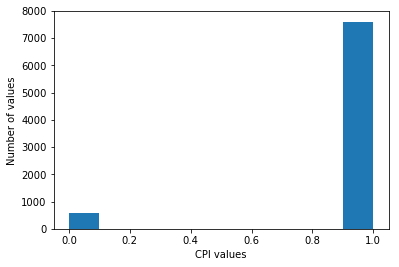

In [10]:
##graph to check number of null values and number of not null values
plt.hist(nullCPI,range=(0,1))
plt.xlabel('CPI values')
plt.ylabel('Number of values')
plt.show() 

In [11]:
##calculating average of CPI 
average_CPI=data_features.CPI.sum()/data_features.shape[0]
average_CPI

160.07075138399216

In [12]:
#replacing null values(i.e -1) by average
data_features.CPI.replace(-1, average_CPI, inplace=True)
data_features.tail()

,Store,Date,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,4842.29,975.03,3.00,2449.97,3169.69,160.070751,NaN,False
8186,45,2013-07-05,9090.48,2268.58,582.74,5797.47,1514.93,160.070751,NaN,False
8187,45,2013-07-12,3789.94,1827.31,85.72,744.84,2150.36,160.070751,NaN,False
8188,45,2013-07-19,2961.49,1047.07,204.19,363.00,1059.46,160.070751,NaN,False
8189,45,2013-07-26,212.02,851.73,2.06,10.88,1864.57,160.070751,NaN,False


DEEPIKA BAGRECHA

# working on unemployment

Summary : The unemployment column consists of Nan values.The Nan values are replaced by first -1. A graph is plotted that shows the freequency of Nan values and not null values in employment column i.e. 0 : Count of Nan Values, 1 : Count of not null Values. Since the graph shows that the Nan values are very less in count when compared to the not null values, we consider the filling of Nan values with mean.

In [13]:
##Replacing Nan values with -1
data_features['Unemployment'].fillna(-1, inplace = True)
##Total number of Nan values
nullUnemployment = data_features['Unemployment'] != -1
null_values=sum(data_features['Unemployment'] == -1)
notnull_values=sum(data_features['Unemployment'] != -1)
print null_values
print notnull_values

585
7605


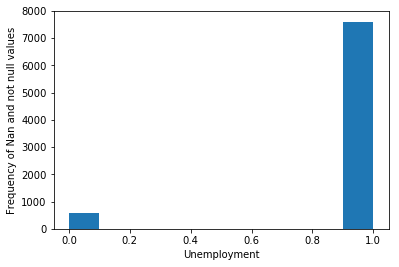

In [14]:
##Graph that shows the frequency of Nan and not null values
plt.hist(nullUnemployment,range=(0,1))
plt.xlabel('Unemployment')
plt.ylabel('Frequency of Nan and not null values')
plt.show()

In [15]:
##Calculation of mean of Unemployment
mean_Unemployment=data_features.Unemployment.mean()
mean_Unemployment

7.196333821733864

In [16]:
##Replacing the -1 values with the mean of Unemployment
data_features.Unemployment.replace(-1, mean_Unemployment, inplace=True)
data_features.tail()

,Store,Date,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,4842.29,975.03,3.00,2449.97,3169.69,160.070751,7.196334,False
8186,45,2013-07-05,9090.48,2268.58,582.74,5797.47,1514.93,160.070751,7.196334,False
8187,45,2013-07-12,3789.94,1827.31,85.72,744.84,2150.36,160.070751,7.196334,False
8188,45,2013-07-19,2961.49,1047.07,204.19,363.00,1059.46,160.070751,7.196334,False
8189,45,2013-07-26,212.02,851.73,2.06,10.88,1864.57,160.070751,7.196334,False


In [17]:
##Replacing Nan values with -1
data_features['Unemployment'].fillna(-1, inplace = True)
##Total number of Nan values
nullUnemployment = data_features['Unemployment'] != -1

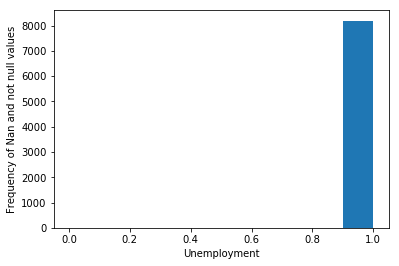

In [18]:
##Graph after replacement of Nan values
not_null_Unemployment= data_features['Unemployment'] != -1
plt.hist(not_null_Unemployment,range=(0,1))
plt.xlabel('Unemployment')
plt.ylabel('Frequency of Nan and not null values')
plt.show()

DIVYANSH SRIVASTAVA AND ELLURU PRUTHVI SAI

# working on markdown 1

Summary: We are using year wise data from features to fill the Markdown 1 values with appropriate values (that is, average mean or -1) inplace of NaN .


In [19]:
#2010 records
users_2010 = data_features[data_features['Date'] >= '2010-01-01']
users_2010 = users_2010[users_2010['Date'] <= '2010-12-31']
users_2010
#2011 records
users_2011 = data_features[data_features['Date'] >= '2011-01-01']
users_2011 = users_2011[users_2011['Date'] <= '2011-12-31']
users_2011
#2012 records
users_2012 = data_features[data_features['Date'] >= '2012-01-01']
users_2012 = users_2012[users_2012['Date'] <= '2012-12-31']
users_2012
#2013 records
users_2013 = data_features[data_features['Date'] >= '2013-01-01']
users_2013 = users_2013[users_2013['Date'] <= '2013-12-31']
users_2013

,Store,Date,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
152,1,2013-01-04,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525000,False
153,1,2013-01-11,6520.24,16134.60,12.17,774.55,4001.25,224.201552,6.525000,False
154,1,2013-01-18,3772.69,3559.46,3.88,246.62,1900.40,224.235813,6.525000,False
155,1,2013-01-25,965.89,1097.91,0.10,225.36,1831.88,224.235552,6.525000,False
156,1,2013-02-01,9290.91,1359.90,265.00,20657.82,972.61,224.235290,6.525000,False
157,1,2013-02-08,32355.16,729.80,280.89,20426.61,4671.78,224.235029,6.525000,True
158,1,2013-02-15,72937.29,6665.52,47.21,13014.67,6310.18,224.276053,6.525000,False
159,1,2013-02-22,20107.75,3163.89,42.20,15657.30,5812.86,224.420289,6.525000,False
160,1,2013-03-01,10610.74,261.46,2.80,25.54,2747.59,224.564526,6.525000,False
161,1,2013-03-08,5000.58,290.46,78.77,606.15,3697.11,224.708763,6.525000,False


# For 2010 Data

In [20]:
##Replacing Nan values with -1
users_2010['MarkDown1'].fillna(-1, inplace = True)
users_2010['MarkDown2'].fillna(-1, inplace = True)
users_2010['MarkDown3'].fillna(-1, inplace = True)
users_2010['MarkDown4'].fillna(-1, inplace = True)
users_2010['MarkDown5'].fillna(-1, inplace = True)
##Total number of Nan values
nullMarkDown1 = users_2010['MarkDown1'] != -1
nullMarkDown2 = users_2010['MarkDown2'] != -1
nullMarkDown3 = users_2010['MarkDown3'] != -1
nullMarkDown4 = users_2010['MarkDown4'] != -1
nullMarkDown5 = users_2010['MarkDown5'] != -1

null_values1=sum(users_2010['MarkDown1'] == -1)
null_values2=sum(users_2010['MarkDown2'] == -1)
null_values3=sum(users_2010['MarkDown3'] == -1)
null_values4=sum(users_2010['MarkDown4'] == -1)
null_values5=sum(users_2010['MarkDown5'] == -1)
print null_values1
print null_values2
print null_values3
print null_values4
print null_values5

2160
2160
2160
2160
2160


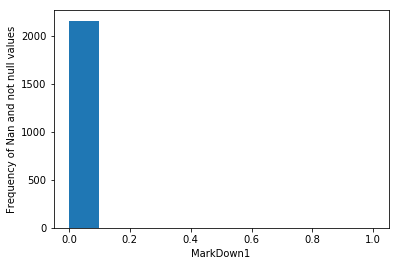

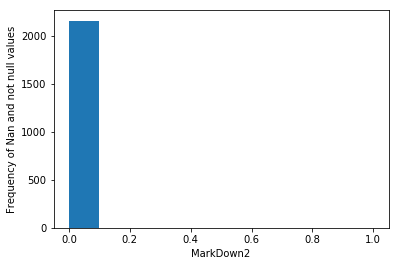

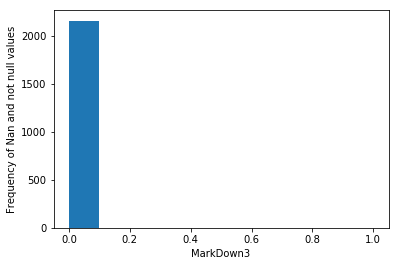

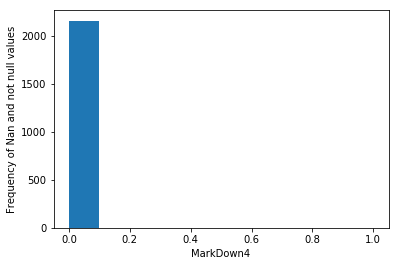

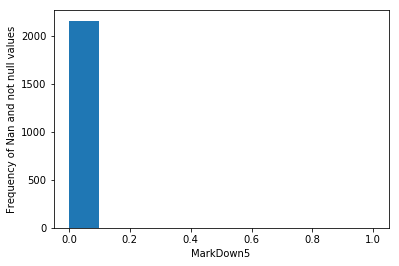

In [21]:
##Graph that shows the frequency of Nan and not null values
plt.hist(nullMarkDown1,range=(0,1))
plt.xlabel('MarkDown1')
plt.ylabel('Frequency of Nan and not null values')
plt.show()
plt.hist(nullMarkDown2,range=(0,1))
plt.xlabel('MarkDown2')
plt.ylabel('Frequency of Nan and not null values')
plt.show()
plt.hist(nullMarkDown3,range=(0,1))
plt.xlabel('MarkDown3')
plt.ylabel('Frequency of Nan and not null values')
plt.show()
plt.hist(nullMarkDown4,range=(0,1))
plt.xlabel('MarkDown4')
plt.ylabel('Frequency of Nan and not null values')
plt.show()
plt.hist(nullMarkDown5,range=(0,1))
plt.xlabel('MarkDown5')
plt.ylabel('Frequency of Nan and not null values')
plt.show()

INFERENCE: We have very large null values in this part of our dataset , so we replaced null values with -1

# For 2011 data

In [22]:
##Replacing Nan values with -1
users_2011['MarkDown1'].fillna(-1, inplace = True)
##Total number of Nan values
nullMarkDown1 = users_2011['MarkDown1'] != -1
null1=sum(users_2011['MarkDown1'] == -1)
print null1
users_2011['MarkDown2'].fillna(-1, inplace = True)
##Total number of Nan values
nullMarkDown2 = users_2011['MarkDown2'] != -1
null2=sum(users_2011['MarkDown2'] == -1)
print null2
users_2011['MarkDown3'].fillna(-1, inplace = True)
##Total number of Nan values
nullMarkDown3 = users_2011['MarkDown3'] != -1
null3=sum(users_2011['MarkDown3'] == -1)
print null3
users_2011['MarkDown4'].fillna(-1, inplace = True)
##Total number of Nan values
nullMarkDown4 = users_2011['MarkDown4'] != -1
null4=sum(users_2011['MarkDown4'] == -1)
print null4
users_2011['MarkDown5'].fillna(-1, inplace = True)
##Total number of Nan values
nullMarkDown5 = users_2011['MarkDown5'] != -1
null5=sum(users_2011['MarkDown5'] == -1)
print null5

1986
2047
1998
2038
1980


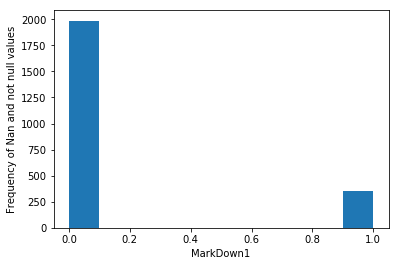

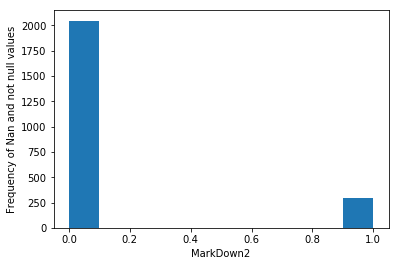

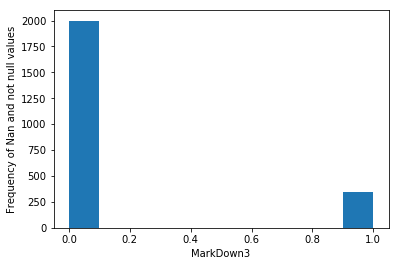

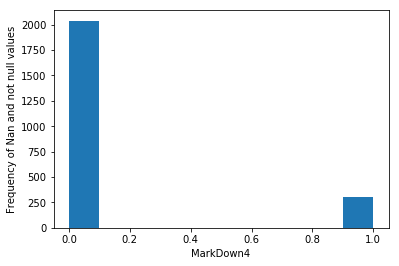

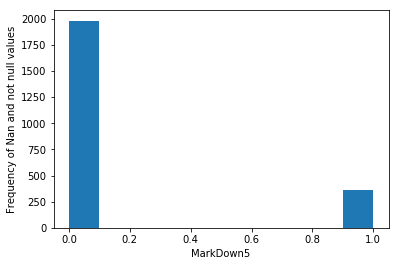

In [23]:

##Graph that shows the frequency of Nan and not null values
plt.hist(nullMarkDown1,range=(0,1))
plt.xlabel('MarkDown1')
plt.ylabel('Frequency of Nan and not null values')
plt.show()
plt.hist(nullMarkDown2,range=(0,1))
plt.xlabel('MarkDown2')
plt.ylabel('Frequency of Nan and not null values')
plt.show()
plt.hist(nullMarkDown3,range=(0,1))
plt.xlabel('MarkDown3')
plt.ylabel('Frequency of Nan and not null values')
plt.show()
plt.hist(nullMarkDown4,range=(0,1))
plt.xlabel('MarkDown4')
plt.ylabel('Frequency of Nan and not null values')
plt.show()
plt.hist(nullMarkDown5,range=(0,1))
plt.xlabel('MarkDown5')
plt.ylabel('Frequency of Nan and not null values')
plt.show()

INFERENCE: We have very large null values in this part of our dataset , so we replaced null values with -1

# For 2012 data

In [24]:
##Replacing Nan values with -1
users_2012['MarkDown1'].fillna(-1, inplace = True)
##Total number of Nan values
nullMarkDown1 = users_2012['MarkDown1'] != -1
null1=sum(users_2012['MarkDown1'] == -1)
print null1
##Replacing Nan values with -1
users_2012['MarkDown2'].fillna(-1, inplace = True)
##Total number of Nan values
nullMarkDown2 = users_2012['MarkDown2'] != -1
null2=sum(users_2012['MarkDown2'] == -1)
print null2
##Replacing Nan values with -1
users_2012['MarkDown3'].fillna(-1, inplace = True)
##Total number of Nan values
nullMarkDown3 = users_2012['MarkDown3'] != -1
null3=sum(users_2012['MarkDown3'] == -1)
print null3
##Replacing Nan values with -1
users_2012['MarkDown4'].fillna(-1, inplace = True)
##Total number of Nan values
nullMarkDown4 = users_2012['MarkDown4'] != -1
null4=sum(users_2012['MarkDown4'] == -1)
print null4
##Replacing Nan values with -1
users_2012['MarkDown5'].fillna(-1, inplace = True)
##Total number of Nan values
nullMarkDown5 = users_2012['MarkDown5'] != -1
null5=sum(users_2012['MarkDown5'] == -1)
print null5

10
763
260
330
0


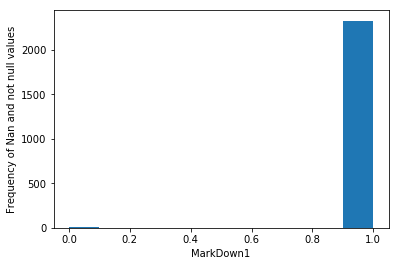

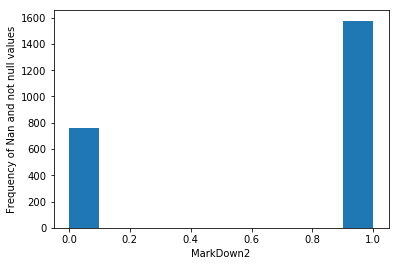

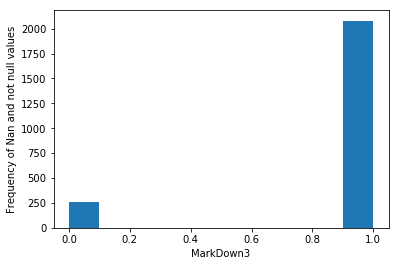

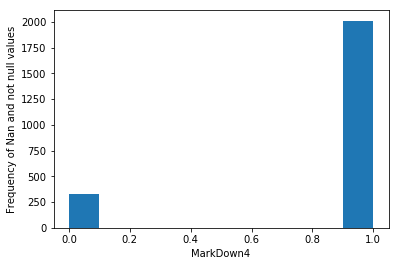

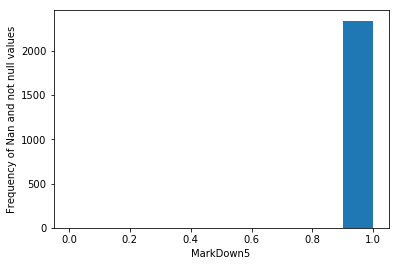

In [25]:

##Graph that shows the frequency of Nan and not null values
plt.hist(nullMarkDown1,range=(0,1))
plt.xlabel('MarkDown1')
plt.ylabel('Frequency of Nan and not null values')
plt.show()
plt.hist(nullMarkDown2,range=(0,1))
plt.xlabel('MarkDown2')
plt.ylabel('Frequency of Nan and not null values')
plt.show()
plt.hist(nullMarkDown3,range=(0,1))
plt.xlabel('MarkDown3')
plt.ylabel('Frequency of Nan and not null values')
plt.show() 
plt.hist(nullMarkDown4,range=(0,1))
plt.xlabel('MarkDown4')
plt.ylabel('Frequency of Nan and not null values')
plt.show()
plt.hist(nullMarkDown5,range=(0,1))
plt.xlabel('MarkDown5')
plt.ylabel('Frequency of Nan and not null values')
plt.show()

In [26]:

##Calculation of mean of Unemployment
mean_MarkDown1=users_2012.MarkDown1.mean()
print mean_MarkDown1
mean_MarkDown2=users_2012.MarkDown2.mean()
print mean_MarkDown2
mean_MarkDown3=users_2012.MarkDown3.mean()
print mean_MarkDown3
mean_MarkDown4=users_2012.MarkDown4.mean()
print mean_MarkDown4
mean_MarkDown5=users_2012.MarkDown5.mean()
print mean_MarkDown5

7024.28738889
2036.00673932
1482.61731197
2754.23312821
4420.33247009


In [27]:

##Replacing the -1 values with the mean of Unemployment
users_2012.MarkDown1.replace(-1, mean_MarkDown1, inplace=True)
users_2012.MarkDown2.replace(-1, mean_MarkDown2, inplace=True)
users_2012.MarkDown3.replace(-1, mean_MarkDown3, inplace=True)
users_2012.MarkDown4.replace(-1, mean_MarkDown4, inplace=True)
users_2012.MarkDown5.replace(-1, mean_MarkDown5, inplace=True)
print users_2012.head()

     Store       Date  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
100      1 2012-01-06    6277.39   21813.16     143.10    1450.13    8483.00   
101      1 2012-01-13    5183.29    8025.87      42.24     453.08    3719.38   
102      1 2012-01-20    4139.87    2807.19      33.88     500.62    3400.21   
103      1 2012-01-27    1164.46    1082.74      44.00      11.00    1222.19   
104      1 2012-02-03   34577.06    3579.21     160.53   32403.87    5630.40   

            CPI  Unemployment  IsHoliday  
100  219.714258         7.348      False  
101  219.892526         7.348      False  
102  219.985689         7.348      False  
103  220.078852         7.348      False  
104  220.172015         7.348      False  


# For 2013 Data

In [28]:
##Replacing Nan values with -1
users_2013['MarkDown1'].fillna(-1, inplace = True)
##Total number of Nan values
nullMarkDown1 = users_2013['MarkDown1'] != -1
null1=sum(users_2013['MarkDown1'] == -1)
print null1
users_2013['MarkDown2'].fillna(-1, inplace = True)
##Total number of Nan values
nullMarkDown2 = users_2013['MarkDown2'] != -1
null2=sum(users_2013['MarkDown2'] == -1)
print null2
users_2013['MarkDown3'].fillna(-1, inplace = True)
##Total number of Nan values
nullMarkDown3 = users_2013['MarkDown3'] != -1
null3=sum(users_2013['MarkDown3'] == -1)
print null3
users_2013['MarkDown4'].fillna(-1, inplace = True)
##Total number of Nan values
nullMarkDown4 = users_2013['MarkDown4'] != -1
null4=sum(users_2013['MarkDown4'] == -1)
print null4
users_2013['MarkDown5'].fillna(-1, inplace = True)
##Total number of Nan values
nullMarkDown5 = users_2013['MarkDown5'] != -1
null5=sum(users_2013['MarkDown5'] == -1)
print null5

2
299
160
198
0


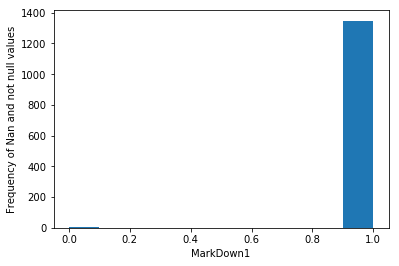

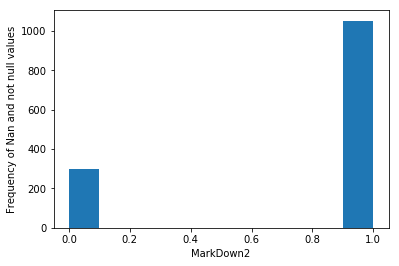

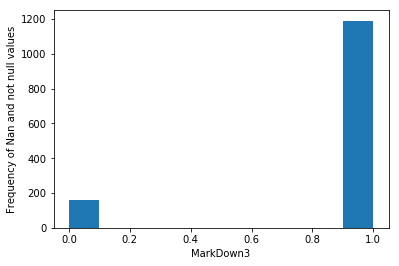

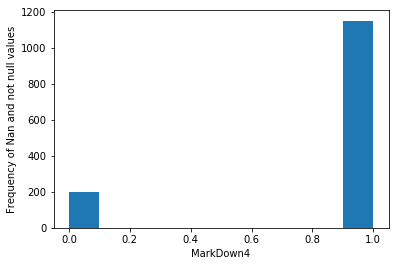

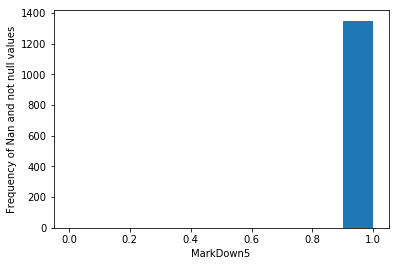

In [29]:
##Graph that shows the frequency of Nan and not null values
plt.hist(nullMarkDown1,range=(0,1))
plt.xlabel('MarkDown1')
plt.ylabel('Frequency of Nan and not null values')
plt.show()
plt.hist(nullMarkDown2,range=(0,1))
plt.xlabel('MarkDown2')
plt.ylabel('Frequency of Nan and not null values')
plt.show()
plt.hist(nullMarkDown3,range=(0,1))
plt.xlabel('MarkDown3')
plt.ylabel('Frequency of Nan and not null values')
plt.show()
plt.hist(nullMarkDown4,range=(0,1))
plt.xlabel('MarkDown4')
plt.ylabel('Frequency of Nan and not null values')
plt.show()
plt.hist(nullMarkDown5,range=(0,1))
plt.xlabel('MarkDown5')
plt.ylabel('Frequency of Nan and not null values')
plt.show()

In [30]:

##Calculation of mean of Unemployment
mean_MarkDown1=users_2013.MarkDown1.mean()
print mean_MarkDown1
##Calculation of mean of Unemployment
mean_MarkDown2=users_2013.MarkDown2.mean()
print mean_MarkDown2
##Calculation of mean of Unemployment
mean_MarkDown3=users_2013.MarkDown3.mean()
print mean_MarkDown3
##Calculation of mean of Unemployment
mean_MarkDown4=users_2013.MarkDown4.mean()
print mean_MarkDown4
##Calculation of mean of Unemployment
mean_MarkDown5=users_2013.MarkDown5.mean()
print mean_MarkDown5

7697.14262963
2146.1494
163.08717037
3337.73498519
3100.54868148


In [31]:
##Replacing the -1 values with the mean of Unemployment
users_2013.MarkDown1.replace(-1, mean_MarkDown1, inplace=True)
users_2013.MarkDown2.replace(-1, mean_MarkDown2, inplace=True)
users_2013.MarkDown3.replace(-1, mean_MarkDown3, inplace=True)
users_2013.MarkDown4.replace(-1, mean_MarkDown4, inplace=True)
users_2013.MarkDown5.replace(-1, mean_MarkDown5, inplace=True)
users_2013.tail()

,Store,Date,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,4842.29,975.03,3.00,2449.97,3169.69,160.070751,7.196334,False
8186,45,2013-07-05,9090.48,2268.58,582.74,5797.47,1514.93,160.070751,7.196334,False
8187,45,2013-07-12,3789.94,1827.31,85.72,744.84,2150.36,160.070751,7.196334,False
8188,45,2013-07-19,2961.49,1047.07,204.19,363.00,1059.46,160.070751,7.196334,False
8189,45,2013-07-26,212.02,851.73,2.06,10.88,1864.57,160.070751,7.196334,False
